In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as rd
from random import *
from scipy.stats import *

# Exercice 1

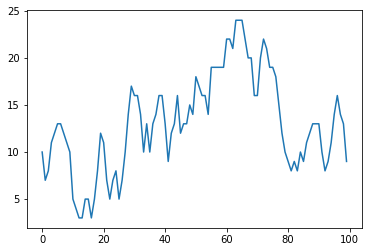

In [93]:
N = 25
n = 100
X = np.zeros(n)
X[0] = 10
for k in range(n-1):
    X[k+1] = binom.rvs(N, X[k]/N)
plt.plot(X)
plt.show()

In [ ]:
#r = rd.randint(0, 2, 100)

def X(N, n, X0):
    X = X0
    for k in range(n-1):
        X = binom.rvs(N, X/N)
    return X

In [110]:
N = 100
X0 = np.arange(0, 101)
Prop = np.array([sum([X(100, 100, x) for i in range(100)])/N for x in X0])

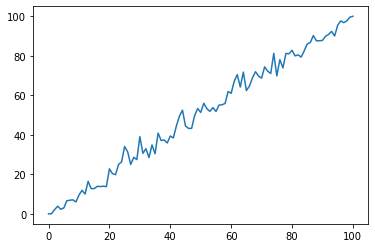

In [111]:
plt.plot(X0, Prop)

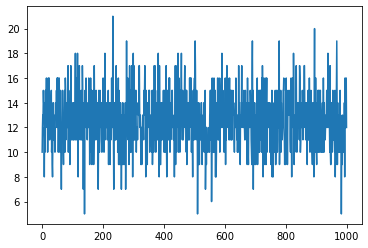

In [119]:
N = 25
n = 1000
alpha = 0.5
X = np.zeros(n)
X[0] = 10
for k in range(n-1):
    X[k+1] = binom.rvs(N, alpha*X[k]/N + (1-alpha)*(1- X[k]/N))
plt.plot(X)
plt.show()

# Urnes de Polya

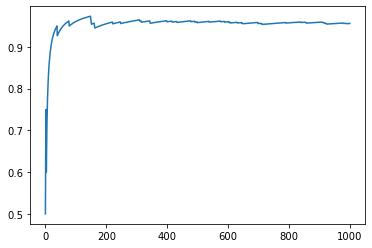

In [139]:
niter = 1000
proba_rouge = np.zeros(niter)
rouge = np.zeros(niter)
rouge[0] = 1
proba_rouge[0] = 0.5
for k in range(niter-1):
    rouge[k+1] = rouge[k] + (rd.rand() < proba_rouge[k])
    proba_rouge[k+1] = rouge[k+1] / (k+3)
plt.plot(proba_rouge)
plt.show()

In [144]:
def point_final():
    niter = 1000
    rouge = 1
    proba_rouge = 0.5
    for k in range(niter-1):
        rouge += (rd.rand() < proba_rouge)
        proba_rouge = rouge / (k+3)
    return proba_rouge

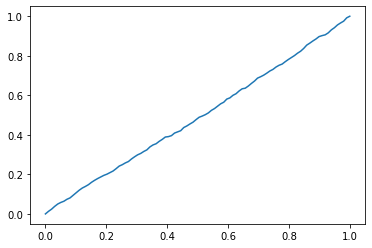

In [180]:
m = 1000
finales = np.array([point_final() for i in range(m)])
x = np.linspace(0, 1, 100)
# Je sais, c'est en O(n^2), mais ça marche !
y = np.array([np.count_nonzero(finales < x)/m for x in x])
plt.plot(x, y)
plt.show()

# Exercice 3

In [185]:
n = 1000
S = np.array([norm.rvs() for i in range(n)])
moyenne = np.cumsum(S) / np.arange(1, n+1)

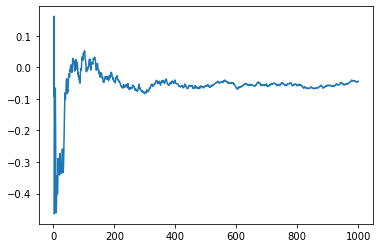

In [186]:
plt.plot(np.arange(1, n+1), moyenne)
plt.show()

In [200]:
def un_point():
    n = 1000
    S = 0
    for i in range(n):
        S += norm.rvs()
    return S / np.sqrt(n)

In [201]:
plein_de_points = [un_point() for k in range(1000)]

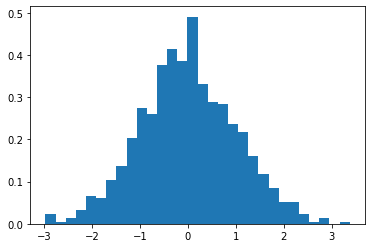

In [202]:
plt.hist(plein_de_points, density=True, bins=30)
plt.show()

# Exercice 4 :

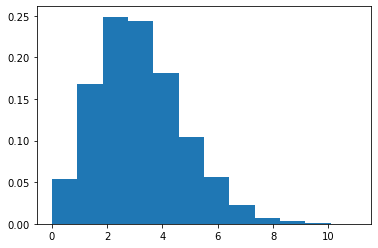

In [212]:
n = 1000
m = 10000
lam = 3
X = np.sort(np.array([binom.rvs(n, lam/n) for k in range(m)]))
plt.hist(X, density=True, bins = 12)
plt.show()

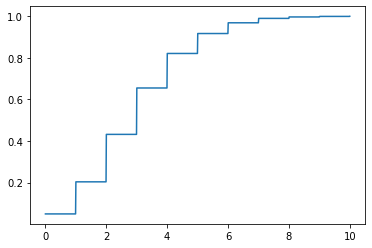

In [221]:
n_repart = 1000
t = np.linspace(0, 10, n_repart)
freq = np.zeros_like(t)

i = 0
j = 0
while i < n_repart:
    while j < m:
        if X[j] <= t[i]:
            freq[i] += 1
            j += 1
        else:
            i += 1
            break

repart = np.cumsum(freq)
repart /= repart[-1]
plt.plot(t, repart)
plt.show()

# Exercice 5 : Polynôme trigonométriques

In [ ]:
n = 15
t = np.linspace(0, 2 * np.pi, 25*n)
a = np.array([])
